In [1]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import matplotlib.pyplot as plt
import json
from keras.utils import plot_model

Using TensorFlow backend.


In [2]:
#data = genfromtxt('calls.csv', delimiter=',',dtype=None)
df = pd.read_csv('callset2.csv')

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0)

def normalize(x):
    return x / ( x[np.argmax(x)] * 0.5 ) -1

In [3]:
ids = list(df['ID'])
dist_ids = set(ids)
id_dic = {} #ml:android
id_dic2 = {} #android:ml

for i, i_d in enumerate(dist_ids):
    id_dic[i_d] = i

ids = [id_dic.get(n) for n in ids]

for i, x in enumerate(id_dic):
    id_dic2[i] = x

In [4]:
time = [ int(t/2) for t in df['Time']]

In [5]:
day_dic = {
    'Sat' : 0,
    'Sun' : 1,
    'Mon' : 2,
    'Tue': 3,
    'Wed' : 4,
    'Thu' : 5,
    'Fri' : 6
}

day = [ day_dic.get(d) for d in df['Day']]

In [6]:
raw_data = np.column_stack((day, time, ids))

In [7]:
unchecked = np.arange(raw_data.shape[0])
cases = raw_data[:,:2]
data = []

while not all(unchecked == -1):
    for i in unchecked:
        if i != -1:
            temp = cases[i]
            break
    same = np.where( [np.array_equal(temp, x) for x in cases] )[0]
    called = np.zeros(len(dist_ids))
    for i in same:
        caller = raw_data[i,2]
        called[caller] += 1
        unchecked[i] = -1
    #print('Removed %s from %s'%(same,unchecked))
    row = np.concatenate((temp,called))
    #data = np.append(data, [row])
    data.append(row)

In [8]:
data = np.array(data, dtype = 'int')
periods = data[:,:2]
labels = data[:,2:]

([<matplotlib.axis.XTick at 0x1853f95d048>,
 <a list of 21 Text xticklabel objects>)

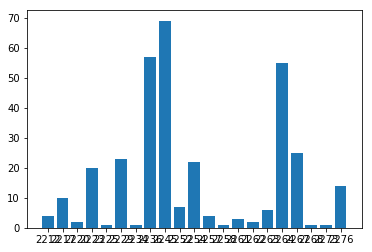

In [9]:
freq = np.zeros(len(dist_ids))
for r in labels:
    for i, x in enumerate(r):
        freq[i] += x
                    
x = np.arange(len(dist_ids))
plt.bar(x, height = freq)
plt.xticks(x, [id_dic2.get(z) for z in x]) #display with original IDs

([<matplotlib.axis.XTick at 0x1853fa54b00>,
 <a list of 21 Text xticklabel objects>)

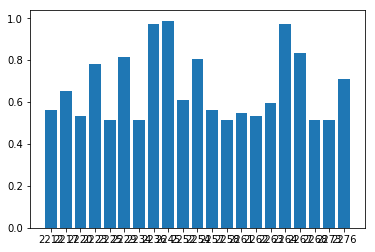

In [10]:
def distribution(freq):
    return freq/np.mean(freq)
    
general_rate = distribution(freq)
general_rate = sigmoid(general_rate)

plt.bar(x, height = general_rate)
plt.xticks(x, [id_dic2.get(z) for z in x]) #display with original IDs


In [11]:
#create the ratings we will train the NN on

ratings = np.zeros((labels.shape[0],labels.shape[1]))

#record a rating for an instance only if there was a call, keep at 0 otherwise
for rate, label in zip(ratings, labels):
    for i, l in enumerate(label):
        rate[i] = sigmoid(l - np.mean(label))

In [12]:
#the NN

xtrain = periods
ytrain = ratings

ins = cases.shape[1]
outs = ratings.shape[1]

nn = Sequential()
nn.add(Dense(ins, activation="relu", input_shape=(ins,)))
nn.add(Dense(32, activation="relu"))
nn.add(Dense(outs, activation="sigmoid"))

#opt = optimizers.SGD(lr=0.5, momentum=0.0, decay=0.00, nesterov=False)
nn.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])
nn.fit(xtrain, ytrain, batch_size = 1, epochs=10)

Epoch 1/10
54/54 [==============================] - 1s 10ms/step - loss: 0.6942 - acc: 0.0000e+00
Epoch 2/10
54/54 [==============================] - 0s 2ms/step - loss: 0.6918 - acc: 0.0000e+00
Epoch 3/10
54/54 [==============================] - 0s 2ms/step - loss: 0.6903 - acc: 0.0000e+00
Epoch 4/10
54/54 [==============================] - 0s 2ms/step - loss: 0.6890 - acc: 0.0000e+00
Epoch 5/10
54/54 [==============================] - 0s 2ms/step - loss: 0.6881 - acc: 0.0000e+00
Epoch 6/10
54/54 [==============================] - 0s 2ms/step - loss: 0.6875 - acc: 0.0000e+00
Epoch 7/10
54/54 [==============================] - 0s 1ms/step - loss: 0.6870 - acc: 0.0000e+00
Epoch 8/10
54/54 [==============================] - 0s 2ms/step - loss: 0.6868 - acc: 0.0000e+00
Epoch 9/10
54/54 [==============================] - 0s 2ms/step - loss: 0.6865 - acc: 0.0000e+00
Epoch 10/10
54/54 [==============================] - 0s 3ms/step - loss: 0.6864 - acc: 0.0000e+00


In [13]:
#nn.fit(xtrain, ytrain, batch_size = 1, epochs=100)

plot_model(nn, to_file='model.png')

In [91]:
a1 = nn.predict(periods[:3], batch_size=1, verbose=0, steps=None)

In [92]:
ratings[:3]

In [98]:
test = np.hstack((periods[:3],a1))

In [99]:
df = pd.DataFrame(test)

with open('data.txt', 'w') as outfile:  
    json.dump(df.to_dict(), outfile)

In [54]:
#the NN

xtrain = periods
ytrain = ratings

ins = cases.shape[1]
outs = ratings.shape[1]

nn = Sequential()
nn.add(Dense(output_dim= 6 ,init = 'uniform', activation = 'relu' ,input_dim = ins))
nn.add(Dense(output_dim= 24 ,init = 'uniform', activation = 'relu' ))
nn.add(Dense(output_dim= outs ,init = 'uniform', activation = 'sigmoid'))
nn.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
nn.fit(xtrain, ytrain, batch_size = 1, epochs=200)

C:\Users\Abood\AppData\Local\conda\conda\envs\venv\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=2, units=6, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Abood\AppData\Local\conda\conda\envs\venv\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=24, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Abood\AppData\Local\conda\conda\envs\venv\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=21, kernel_initializer="uniform")`
  if sys.path[0] == '':


Epoch 1/200
54/54 [==============================] - 1s 14ms/step - loss: 0.6916 - acc: 0.0000e+00
Epoch 2/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6888 - acc: 0.0000e+00
Epoch 3/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6879 - acc: 0.0000e+00
Epoch 4/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6876 - acc: 0.0000e+00
Epoch 5/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6873 - acc: 0.0000e+00
Epoch 6/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6872 - acc: 0.0000e+00
Epoch 7/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6871 - acc: 0.0000e+00
Epoch 8/200
54/54 [==============================] - 0s 1ms/step - loss: 0.6870 - acc: 0.0000e+00
Epoch 9/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6870 - acc: 0.0000e+00
Epoch 10/200
54/54 [==============================] - 0s 2ms/step - loss: 0.6868 - acc: 0.0000e+00
Epoch 11/200
54/54